In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Users_behavior.csv")

In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Значения в столбцах датафрейма имеют различные масштабы.

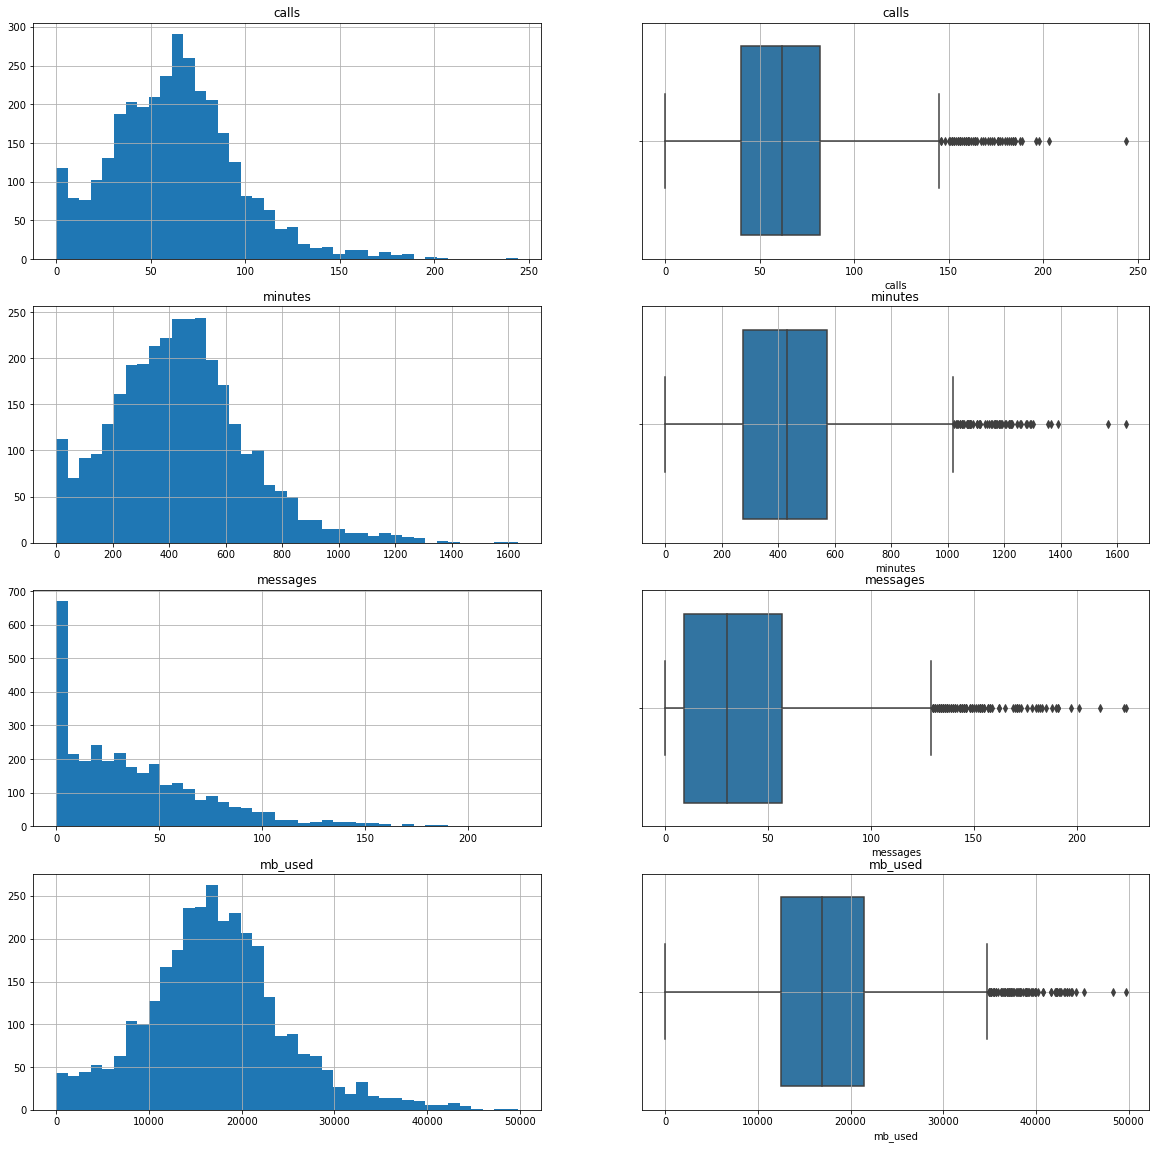

In [7]:
fig_2, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

axes[0][0].hist(x=df['calls'], bins=40)
axes[0][0].set_title('calls')
axes[0][0].grid()
boxplot=sns.boxplot(data=df, x='calls', ax=axes[0][1])
boxplot.set_title('calls')
boxplot.grid()

axes[1][0].hist(x=df['minutes'], bins=40)
axes[1][0].set_title('minutes')
axes[1][0].grid()
boxplot=sns.boxplot(data=df, x='minutes', ax=axes[1][1])
boxplot.set_title('minutes')
boxplot.grid()

axes[2][0].hist(x=df['messages'], bins=40)
axes[2][0].set_title('messages')
axes[2][0].grid()
boxplot=sns.boxplot(data=df, x='messages', ax=axes[2][1])
boxplot.set_title('messages')
boxplot.grid()

axes[3][0].hist(x=df['mb_used'], bins=40)
axes[3][0].set_title('mb_used')
axes[3][0].grid()
boxplot=sns.boxplot(data=df, x='mb_used', ax=axes[3][1])
boxplot.set_title('mb_used')
boxplot.grid()


На графиках наблюдается явная ассимерия, что свидетельсвует об отсутсвии нормального распределения. Кроме того, наблюдаются выбросы, особенно это видно в "messages". В дальнейшем необходимо провести стандартизацию признаков для приведения их к виду нормального распределения и для масштабирования.
Наиболее близко к нормальному распределению - это признак "mb_used"

In [8]:
# выделим целевой признак
y = df['is_ultra']
X = df.drop(['is_ultra'], axis=1)

In [9]:
st_sc = StandardScaler()
X = st_sc.fit_transform(X)

Разделим датафрейм на тестовый и тренировочный

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=5)

In [11]:
# Логистическая регрессия
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [12]:
lr_predicted = lr_model.predict(X_test)

print(f'Logistic Regression Precision - {precision_score(y_test, lr_predicted)}')
print(f'Logistic Regression Recall - {recall_score(y_test, lr_predicted)}')
print(f'Logistic Regression F1 - {f1_score(y_test, lr_predicted)}')
print(f'Logistic Regression ROC AUC - {roc_auc_score(y_test, lr_predicted)}')

Logistic Regression Precision - 0.7422680412371134
Logistic Regression Recall - 0.24742268041237114
Logistic Regression F1 - 0.3711340206185567
Logistic Regression ROC AUC - 0.6051653461409037


In [13]:
# Дерево принятия решений
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
dt_predicted = dt_model.predict(X_test)

print(f'Decision Tree Classifier Precision - {precision_score(y_test, dt_predicted)}')
print(f'Decision Tree Classifier Recall - {recall_score(y_test, dt_predicted)}')
print(f'Decision Tree Classifier F1 - {f1_score(y_test, dt_predicted)}')
print(f'Decision Tree Classifier ROC AUC - {roc_auc_score(y_test, dt_predicted)}')

Decision Tree Classifier Precision - 0.5189873417721519
Decision Tree Classifier Recall - 0.563573883161512
Decision Tree Classifier F1 - 0.5403624382207579
Decision Tree Classifier ROC AUC - 0.6690272976638421


In [15]:
# Метод опорных векторов
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [16]:
svc_predicted = svc_model.predict(X_test)

print(f'SVC Precision - {precision_score(y_test, svc_predicted)}')
print(f'SVC Recall - {recall_score(y_test, svc_predicted)}')
print(f'SVC F1 - {f1_score(y_test, svc_predicted)}')
print(f'SVC ROC AUC - {roc_auc_score(y_test, svc_predicted)}')

SVC Precision - 0.7180851063829787
SVC Recall - 0.4639175257731959
SVC F1 - 0.5636743215031315
SVC ROC AUC - 0.6926412554682003


Вывод:

для сравнения было использовано три различных модели, однако все они показали не самые высокие результаты. Связано это прежде всего с тем, что исходные данные полохо обработаны: они не были очищены от выбрасов; не была проведена проверка на корреляцию признаков. Кроме того, гиперпараметры моделей взяты по умолчанию, для более качественной настройки необходимо произвести решетчатый или рандомизированный поиск.

Все вышесказанное не было проведено, прежде всего, по причине ограниченного времени, а исследование данных это долгая и кропотливая работа, а также в связи с тем, что в задании не ставилась задача подготовить данные, найти и обучить самую лучшую модель.